In [1]:
from pathlib import Path
import shutil
import pandas as pd
import matplotlib.pyplot as plt

from frequency_analysis.logging import create_logger
from frequency_analysis.data_io import read_yearly_maxima
from frequency_analysis.plotting import plot_yearly_data

In [2]:
# Read and validate input data

# Thames
path_data = "../data/39001_Thames.csv"
data = read_yearly_maxima(path=path_data, date_format="%d/%m/%Y")

# Santa Lucia
# path_data = "../data/84111_SantaLucia.csv"
# data = read_yearly_maxima(path=path_data, date_format="%Y")

data.tail()

date
2018    320.000
2019    445.000
2020        NaN
2021    423.300
2022    193.249
Name: flow_cms, dtype: float64

In [3]:
# Start report and log
name = path_data.split("/")[-1][:-4]
output_path = Path("../reports") / name
try:
    shutil.rmtree(output_path)
except OSError:
    print("Starting new analysis!")
Path.mkdir(output_path, exist_ok=True)

logger = create_logger(output_path / f"{name}.log")
logger.info(f"Started analysis of {name}")

2024-03-17 20:53:46 - Started analysis of 39001_Thames


Starting new analysis!


In [4]:
# Input data
logger.info("Input data:\n" + data.to_string(header=False))
logger.info("End of input data")

2024-03-17 20:53:50 - Input data:
1883    510.570
1884    230.950
1885    244.210
1886        NaN
1887    283.780
1888    207.590
1889    237.420
1890    204.530
1891    339.400
1892        NaN
1893    299.720
1894    806.000
1895        NaN
1896    201.640
1897    350.870
1898    171.380
1899    262.100
1900    533.300
1901    200.480
1902        NaN
1903    385.970
1904    516.570
1905    229.480
1906    249.050
1907    375.650
1908        NaN
1909    203.850
1910    427.960
1911        NaN
1912    366.760
1913    255.260
1914    256.360
1915    585.080
1916    373.500
1917        NaN
1918    350.550
1919    334.240
1920    250.840
1921    240.000
1922    197.800
1923    231.370
1924    297.570
1925    521.880
1926    369.920
1927    374.650
1928    526.150
1929    551.930
1930    228.320
1931        NaN
1932    274.410
1933    478.530
1934     94.560
1935    227.320
1936    478.210
1937    437.800
1938        NaN
1939    369.450
1940    409.540
1941        NaN
1942    298.300
1943  

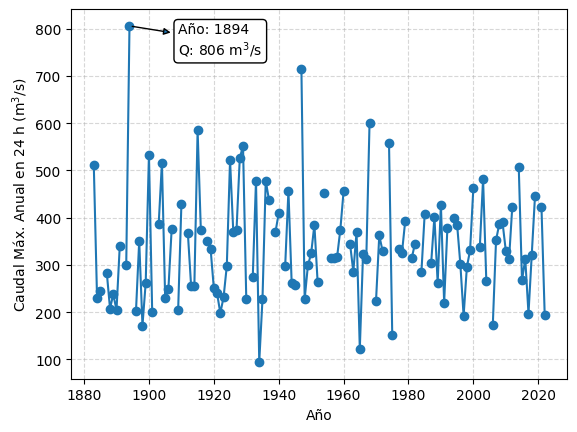

In [6]:
# Plot
fig, ax = plot_yearly_data(data=data, label_delta_x=15, label_delta_y=-60, discharge=True)
plt.savefig(output_path / Path("ts-plot.png"), dpi=300)
plt.show()